In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Import data

In [2]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
import pandas as pd
import numpy as np
df_breast_cancer = pd.DataFrame(breast_cancer.data)
df_breast_cancer.columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                         'mean smoothness', 'mean compactness', 'mean concavity',
                         'mean concave points', 'mean symmetry', 'mean fractal dimension',
                         'radius error', 'texture error', 'perimeter error', 'area error',
                         'smoothness error', 'compactness error', 'concavity error',
                         'concave points error', 'symmetry error', 'fractal dimension error',
                         'worst radius', 'worst texture', 'worst perimeter', 'worst area',
                         'worst smoothness', 'worst compactness', 'worst concavity',
                         'worst concave points', 'worst symmetry', 'worst fractal dimension']
df_breast_cancer['target'] = pd.DataFrame(breast_cancer.target)
df_breast_cancer.head(10)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


# Xem thông tin dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


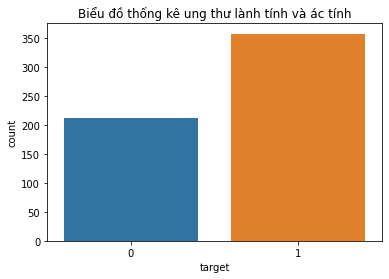

In [3]:
print(df_breast_cancer.info())
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df_breast_cancer['target'], label = 'count')
plt.title('Biểu đồ thống kê ung thư lành tính và ác tính')
plt.savefig('/content/drive/My Drive/Colab Notebooks/images/BC_01.png', dpi=300)
plt.show()

# Độ tương quan giữa các thuộc tính

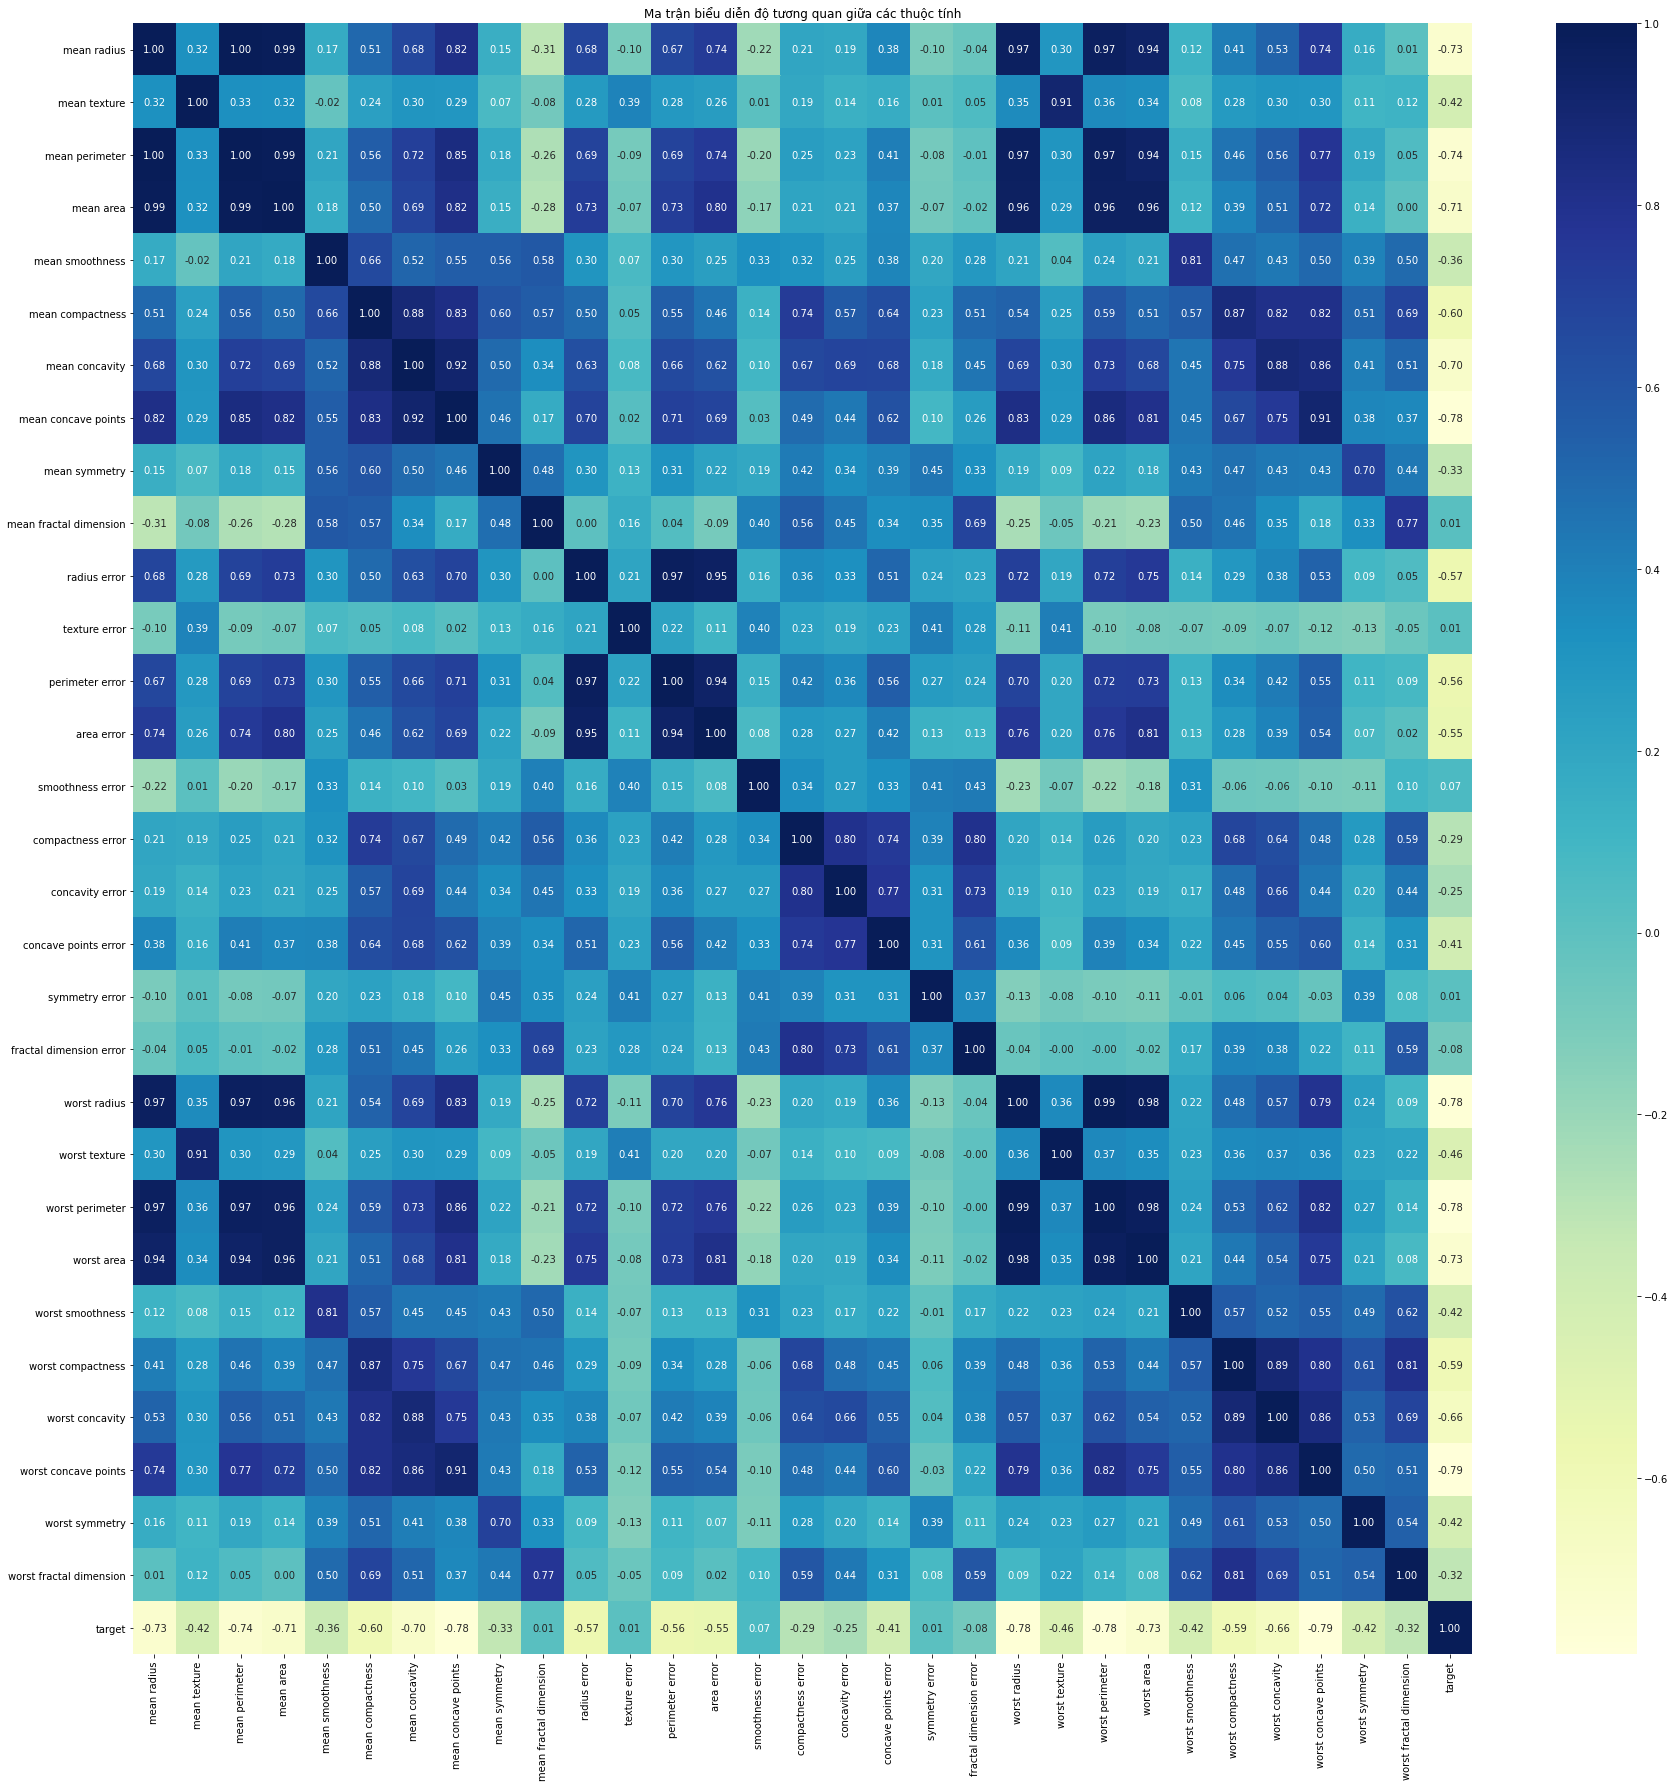

In [4]:
breast_cancer_corr  = df_breast_cancer.corr()
plt.figure(figsize = (30, 30))
sns.heatmap(breast_cancer_corr, annot = True, cmap = 'YlGnBu', fmt = '.2f')
plt.title('Ma trận biểu diễn độ tương quan giữa các thuộc tính')
plt.savefig('/content/drive/My Drive/Colab Notebooks/images/BC_02.png', dpi=300)
plt.show()

# Đồ thị biểu diễn độ tương quan các thuộc tính

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

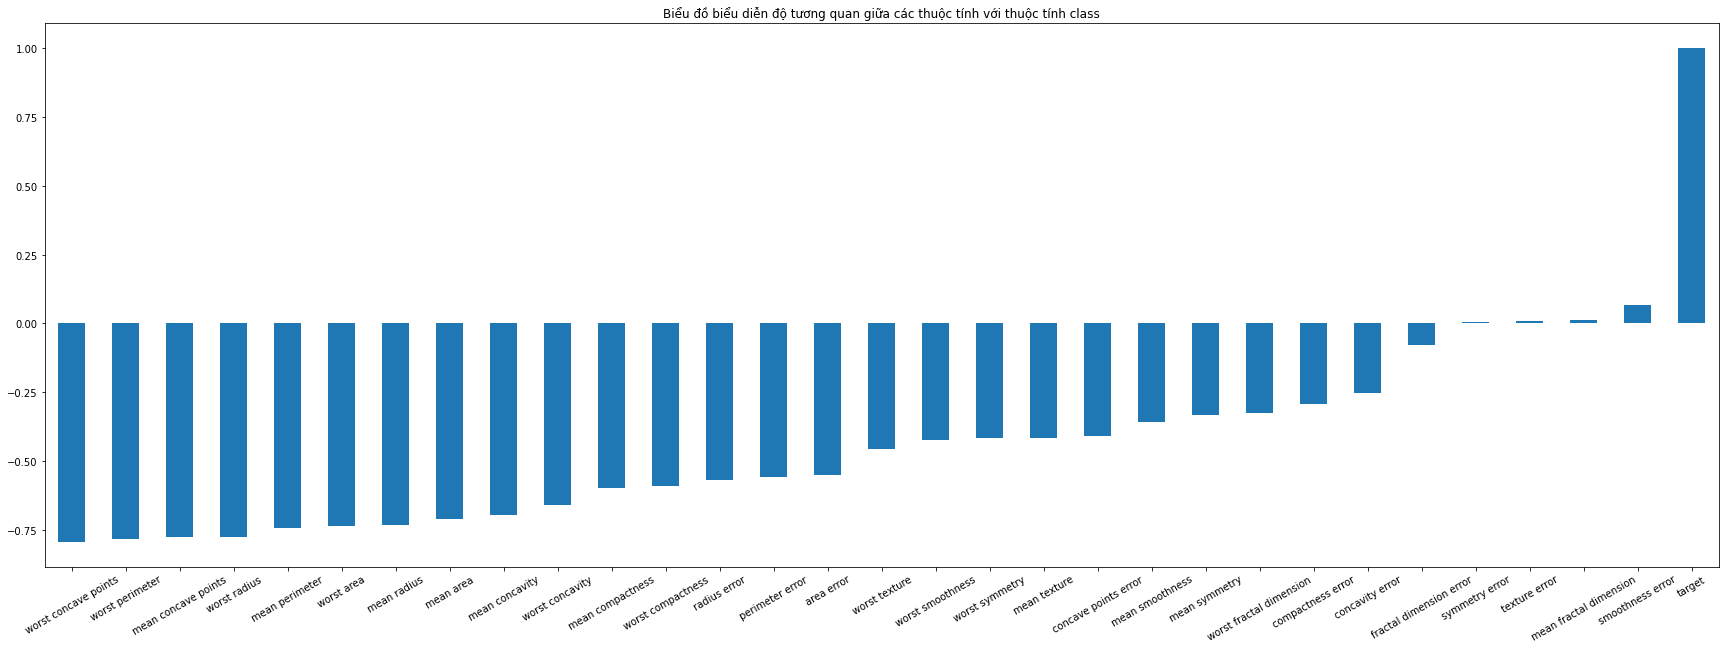

In [5]:
print(breast_cancer_corr['target'].sort_values(ascending = False))
plt.figure(figsize = (30, 10))
breast_cancer_corr['target'].sort_values().plot(kind = 'bar', sort_columns = True)
plt.xticks(rotation = 30, horizontalalignment = "center")
plt.savefig('/content/drive/My Drive/Colab Notebooks/images/BC_05.png', dpi=300)
plt.title('Biểu đồ biểu diễn độ tương quan giữa các thuộc tính với thuộc tính class')
plt.show()

<Figure size 2160x1080 with 0 Axes>

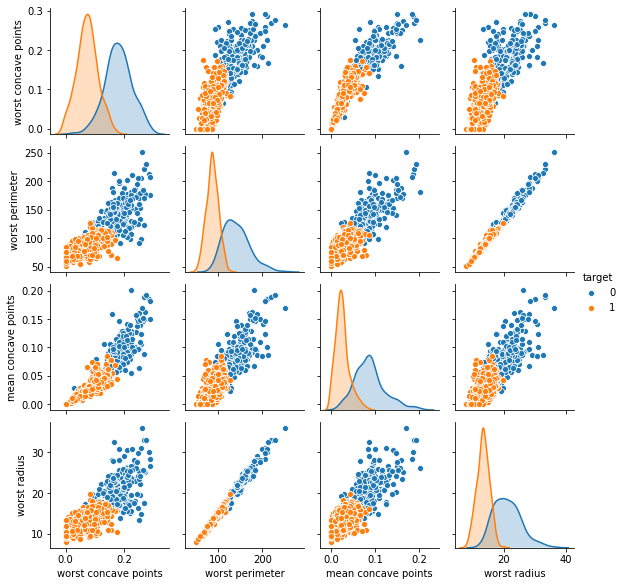

In [6]:
plt.figure(figsize = (30, 15))
max_corr_target = df_breast_cancer[['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'target']][:]
sns.pairplot(max_corr_target, hue = 'target', height = 2.0)
plt.savefig('/content/drive/My Drive/Colab Notebooks/images/BC_03.png', dpi=300)
plt.show()

# Chia test set và training set

In [7]:
X = breast_cancer.data
y = breast_cancer.target
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, stratify=y,
                                                    random_state = 0)

# Thống kê số nhãn của test set và training set

In [8]:
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

{0: 212, 1: 357}
{0: 170, 1: 285}
{0: 42, 1: 72}


# Phân tích thông tin của các thuộc tính bằng PCA

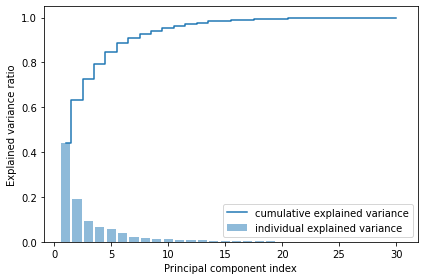

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
X_pca = pca.fit_transform(X_std)
var_exp = pca.explained_variance_ratio_
import numpy as np
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
import matplotlib.pyplot as plt
plt.bar(range(1, 31), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 31), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Colab Notebooks/images/BC_11.png', dpi=300)
plt.show()


# Huấn luyện mô hình và tinh chỉnh tham số

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Mô hình Logistic Regression

In [11]:
pipe_lr = Pipeline([('pca', PCA()),
                    ('lr', LogisticRegression())])
param_C = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_pca = list(np.arange(1, 31, 1))
param_grid = [{'pca__n_components': param_pca,
               'lr__C': param_C,
               'lr__penalty': ['l1'],
               'lr__solver': ['liblinear']},
              {'pca__n_components': param_pca,
               'lr__C': param_C,
               'lr__penalty': ['l2']}]
gs_lr = GridSearchCV(estimator = pipe_lr,
                     param_grid = param_grid,
                     scoring = 'accuracy',
                     cv = 10,
                     verbose = 1,
                     n_jobs = -1)
gs_lr.fit(X_train, y_train)
print(gs_lr.best_params_)
print(gs_lr.best_score_)


Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 3100 tasks      | elapsed:   24.5s


{'lr__C': 1.0, 'lr__penalty': 'l1', 'lr__solver': 'liblinear', 'pca__n_components': 10}
0.9847342995169083


[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:   32.1s finished


# Lưu mô hình Logistic regression

In [12]:
from sklearn.externals import joblib
joblib.dump(gs_lr.best_estimator_, '/content/drive/My Drive/Colab Notebooks/models/best_lr_BC.pkl')
joblib.dump(gs_lr, '/content/drive/My Drive/Colab Notebooks/models/gs_lr_object_BC.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['/content/drive/My Drive/Colab Notebooks/models/gs_lr_object_BC.pkl']

# Mô hình SVC

In [13]:
pipe_svc = Pipeline([('pca', PCA()),
                     ('svc', SVC())])
param_gamma = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
param_kernel = ['rbf', 'linear', 'sigmoid']
param_grid = [{'pca__n_components': param_pca,
               'svc__C': param_C,
               'svc__kernel': param_kernel,
               'svc__gamma': param_gamma,
               'svc__probability': [True]}]
gs_svc = GridSearchCV(estimator = pipe_svc,
                      param_grid = param_grid,
                      scoring = 'accuracy',
                      cv = 10,
                      verbose = 1,
                      n_jobs = -1)
gs_svc.fit(X_train, y_train)
print(gs_svc.best_params_)
print(gs_svc.best_score_)


Fitting 10 folds for each of 3240 candidates, totalling 32400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 9754 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 13536 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 16136 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 19136 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 22536 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 26336 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 30536 tasks      | elapsed: 12.1min


{'pca__n_components': 9, 'svc__C': 10.0, 'svc__gamma': 0.0001, 'svc__kernel': 'linear', 'svc__probability': True}
0.9847342995169083


[Parallel(n_jobs=-1)]: Done 32400 out of 32400 | elapsed: 12.9min finished


# Lưu mô hình SVC

In [14]:
from sklearn.externals import joblib
joblib.dump(gs_svc.best_estimator_, '/content/drive/My Drive/Colab Notebooks/models/best_svc_BC.pkl')
joblib.dump(gs_svc, '/content/drive/My Drive/Colab Notebooks/models/gs_svc_object_BC.pkl')

['/content/drive/My Drive/Colab Notebooks/models/gs_svc_object_BC.pkl']

# Mô hình Decision Tree

In [15]:
pipe_tree = Pipeline([('pca', PCA()),
                      ('tree', DecisionTreeClassifier())])
param_criterion = ['entropy', 'gini']
param_depth = list(np.arange(1, 40, 1))
param_grid = [{'pca__n_components': param_pca,
               'tree__criterion': param_criterion,
               'tree__max_depth': param_depth}]

gs_tree = GridSearchCV(estimator = pipe_tree,
                       param_grid = param_grid,
                       scoring = 'accuracy',
                       cv = 10,
                       verbose = 1,
                       n_jobs = -1)
gs_tree.fit(X_train, y_train)
print(gs_tree.best_params_)

Fitting 10 folds for each of 2340 candidates, totalling 23400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 5756 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 13756 tasks      | elapsed:  1.1min


{'pca__n_components': 8, 'tree__criterion': 'gini', 'tree__max_depth': 33}


[Parallel(n_jobs=-1)]: Done 23400 out of 23400 | elapsed:  2.2min finished


# Lưu mô hình decision tree 

In [16]:
from sklearn.externals import joblib
joblib.dump(gs_tree.best_estimator_, '/content/drive/My Drive/Colab Notebooks/models/best_tree_BC.pkl')
joblib.dump(gs_tree, '/content/drive/My Drive/Colab Notebooks/models/gs_tree_object_BC.pkl')

['/content/drive/My Drive/Colab Notebooks/models/gs_tree_object_BC.pkl']

# Mô hình KNN

In [17]:
pipe_knn = Pipeline([('pca', PCA()),
                     ('knn', KNeighborsClassifier())])
param_neighbors = list(np.arange(1, 20, 1))
param_dist1 = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
param_dist2 = ['seuclidean', 'mahalanobis']
param_weights = ['uniform', 'distance']
param_neighbors = list(np.arange(1, 20, 1))
param_grid = [{'pca__n_components': param_pca,
              'knn__n_neighbors': param_neighbors,
              'knn__weights': param_weights,
              'knn__metric': param_dist1},
             {'pca__n_components': param_pca,
              'knn__n_neighbors': param_neighbors,
              'knn__weights': param_weights,
              'knn__metric': param_dist2,
              'knn__metric_params': [{'V': np.cov(X_train)}]}]

gs_knn = GridSearchCV(estimator = pipe_knn,
                    param_grid = param_grid,
                    scoring = 'accuracy',
                    cv=10,
                    verbose = 1,
                    n_jobs = -1)

gs_knn.fit(X_train, y_train)
print(gs_knn.best_params_)
print(gs_knn.best_score_)


Fitting 10 folds for each of 6840 candidates, totalling 68400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 2940 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 6940 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 12540 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 19740 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 28540 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 38940 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 50940 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 64540 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 68400 out of 68400 | elapsed:  8.3min finished


{'knn__metric': 'manhattan', 'knn__n_neighbors': 6, 'knn__weights': 'uniform', 'pca__n_components': 23}
0.9847342995169083


# Lưu mô hình KNN

In [18]:
from sklearn.externals import joblib
joblib.dump(gs_knn.best_estimator_, '/content/drive/My Drive/Colab Notebooks/models/best_knn_BC.pkl')
joblib.dump(gs_knn, '/content/drive/My Drive/Colab Notebooks/models/gs_knn_object_BC.pkl')

['/content/drive/My Drive/Colab Notebooks/models/gs_knn_object_BC.pkl']

# Kết quả trung bình của 10 folds trên tập train của bốn mô hình dựa vào độ đo ROC AUC

In [19]:
best_lr = gs_lr.best_estimator_
best_svc = gs_svc.best_estimator_
best_tree = gs_tree.best_estimator_
best_knn = gs_knn.best_estimator_
from sklearn.model_selection import cross_val_score
clf_labels = ['Logistic regression', 'SVC', 'Decision tree', 'KNN']
all_clf = [best_lr, best_svc, best_tree, best_knn]
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator = clf,
                             X = X_train, 
                             y = y_train,
                             cv = 10,
                             scoring = 'roc_auc')
    print("ROC_AUC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

ROC_AUC: 1.00 (+/- 0.01) [Logistic regression]
ROC_AUC: 1.00 (+/- 0.01) [SVC]
ROC_AUC: 0.93 (+/- 0.05) [Decision tree]
ROC_AUC: 0.99 (+/- 0.02) [KNN]


# Minh họa bốn kết quả trên bằng đồ thị 

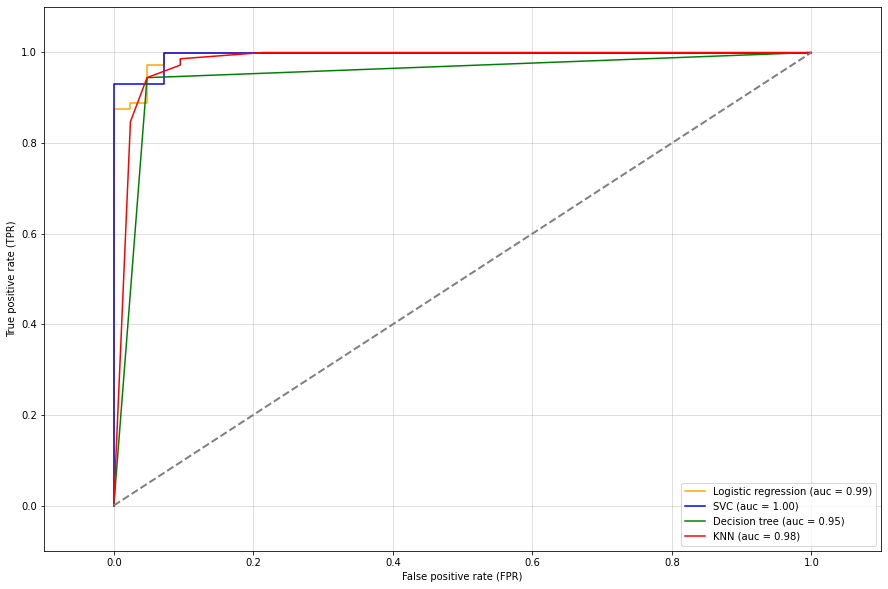

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
colors = ['orange', 'blue', 'green', 'red']
plt.figure(figsize = (15, 10))
for clf, label, clr in zip(all_clf,
               clf_labels, colors):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.savefig('/content/drive/My Drive/Colab Notebooks/images/BC_10', dpi=300)
plt.show()

# Bảng báo cáo kết quả các mô hình

In [21]:
best_lr.fit(X_train, y_train)
best_svc.fit(X_train, y_train)
best_tree.fit(X_train, y_train)
best_knn.fit(X_train, y_train)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, best_lr.predict(X_test)))
print(classification_report(y_test, best_svc.predict(X_test)))
print(classification_report(y_test, best_tree.predict(X_test)))
print(classification_report(y_test, best_knn.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

              preci

# Confusion matrix của các mô hình

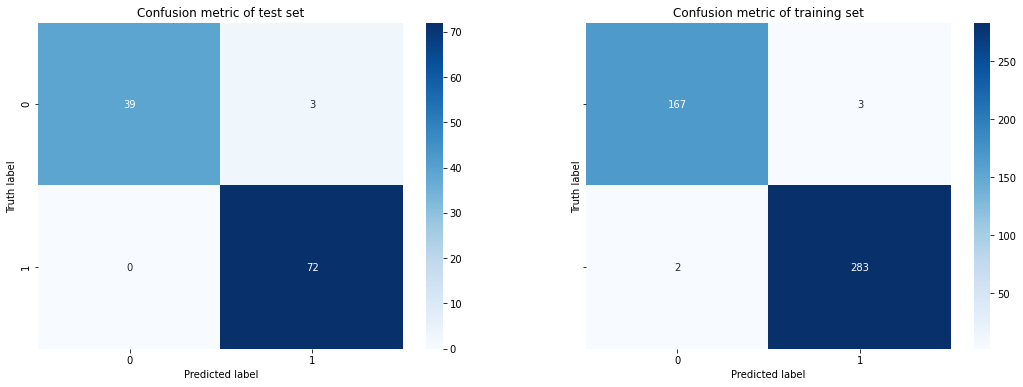

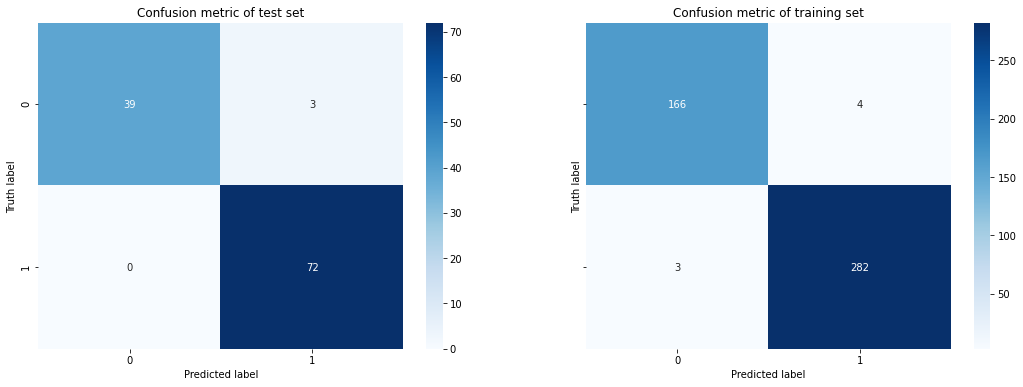

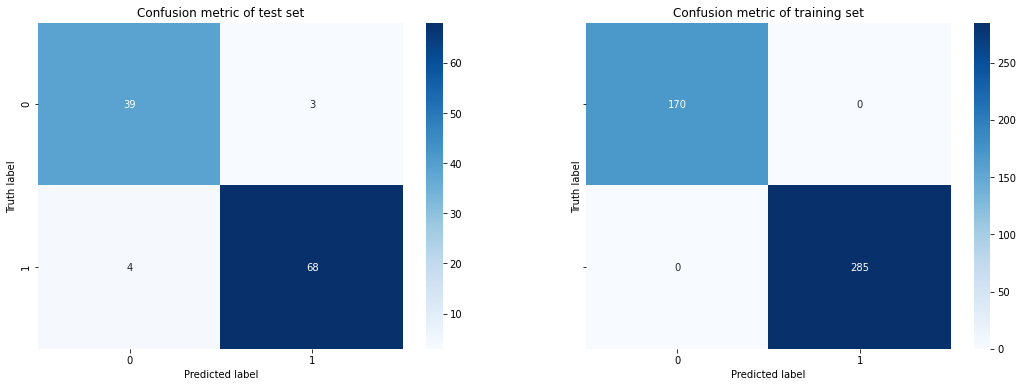

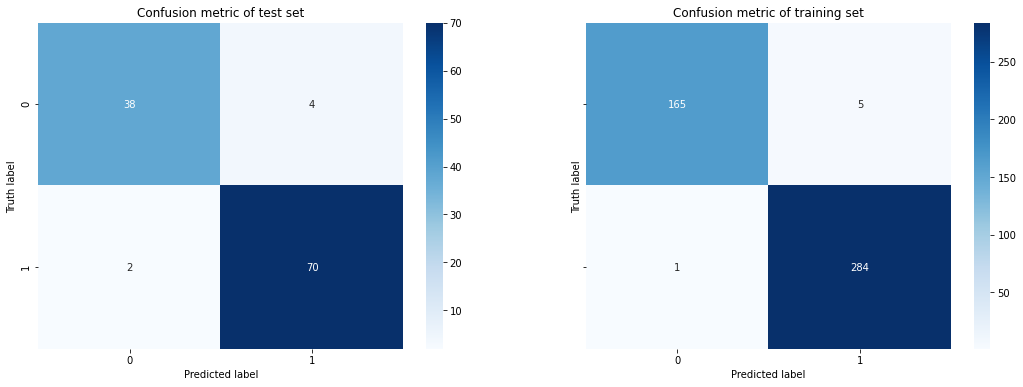

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm_lr_test = confusion_matrix(y_test, best_lr.predict(X_test))
cm_svc_test = confusion_matrix(y_test, best_svc.predict(X_test))
cm_tree_test = confusion_matrix(y_test, best_tree.predict(X_test))
cm_knn_test = confusion_matrix(y_test, best_knn.predict(X_test))
cm_lr_train = confusion_matrix(y_train, best_lr.predict(X_train))
cm_svc_train = confusion_matrix(y_train, best_svc.predict(X_train))
cm_tree_train = confusion_matrix(y_train, best_tree.predict(X_train))
cm_knn_train = confusion_matrix(y_train, best_knn.predict(X_train))


f, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6), sharey=True)
g1 = sns.heatmap(cm_lr_test, annot = True, cmap = 'Blues', fmt = 'd', ax = ax1)
g1.set_xlabel('Predicted label')
g1.set_ylabel('Truth label')
g1.set_title('Confusion metric of test set')

g2 = sns.heatmap(cm_lr_train, annot = True, cmap = 'Blues', fmt = 'd', ax = ax2)
g2.set_xlabel('Predicted label')
g2.set_ylabel('Truth label')
g2.set_title('Confusion metric of training set')
plt.savefig('/content/drive/My Drive/Colab Notebooks/images/BC_06.png', dpi=300)
plt.show()

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6), sharey=True)
g1 = sns.heatmap(cm_svc_test, annot = True, cmap = 'Blues', fmt = 'd', ax = ax1)
g1.set_xlabel('Predicted label')
g1.set_ylabel('Truth label')
g1.set_title('Confusion metric of test set')

g2 = sns.heatmap(cm_svc_train, annot = True, cmap = 'Blues', fmt = 'd', ax = ax2)
g2.set_xlabel('Predicted label')
g2.set_ylabel('Truth label')
g2.set_title('Confusion metric of training set')
plt.savefig('/content/drive/My Drive/Colab Notebooks/images/BC_07.png', dpi=300)
plt.show()

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6), sharey=True)
g1 = sns.heatmap(cm_tree_test, annot = True, cmap = 'Blues', fmt = 'd', ax = ax1)
g1.set_xlabel('Predicted label')
g1.set_ylabel('Truth label')
g1.set_title('Confusion metric of test set')

g2 = sns.heatmap(cm_tree_train, annot = True, cmap = 'Blues', fmt = 'd', ax = ax2)
g2.set_xlabel('Predicted label')
g2.set_ylabel('Truth label')
g2.set_title('Confusion metric of training set')
plt.savefig('/content/drive/My Drive/Colab Notebooks/images/BC_08.png', dpi=300)
plt.show()

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6), sharey=True)
g1 = sns.heatmap(cm_knn_test, annot = True, cmap = 'Blues', fmt = 'd', ax = ax1)
g1.set_xlabel('Predicted label')
g1.set_ylabel('Truth label')
g1.set_title('Confusion metric of test set')

g2 = sns.heatmap(cm_knn_train, annot = True, cmap = 'Blues', fmt = 'd', ax = ax2)
g2.set_xlabel('Predicted label')
g2.set_ylabel('Truth label')
g2.set_title('Confusion metric of training set')
plt.savefig('/content/drive/My Drive/Colab Notebooks/images/BC_09.png', dpi=300)
plt.show()



# Huấn luyện mô hình Majority voting

In [23]:
from sklearn.ensemble import VotingClassifier
mv_clf = VotingClassifier(estimators = [('lr', best_lr), ('svc', best_svc),
                                       ('tree', best_tree), ('knn', best_knn)], voting = 'soft')
mv_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              Pipeline(memory=None,
                                       steps=[('pca',
                                               PCA(copy=True,
                                                   iterated_power='auto',
                                                   n_components=10,
                                                   random_state=None,
                                                   svd_solver='auto', tol=0.0,
                                                   whiten=False)),
                                              ('lr',
                                               LogisticRegression(C=1.0,
                                                                  class_weight=None,
                                                                  dual=False,
                                                                  fit_intercept=True,
                                                               

# Lưu mô hình Majority voting

In [24]:
from sklearn.externals import joblib
joblib.dump(mv_clf, '/content/drive/My Drive/Colab Notebooks/models/mv_clf.pkl')


['/content/drive/My Drive/Colab Notebooks/models/mv_clf.pkl']

# Kết quả 10 folds trên training set của năm mô hình dựa vào độ đo ROC AUC

In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

clf_labels = ['Logistic regression', 'SVC', 'Decision tree', 'KNN', 'Majority voting']
all_clf = [best_lr, best_svc, best_tree, best_knn, mv_clf]
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator = clf,
                             X = X_train, 
                             y = y_train,
                             cv = 10,
                             scoring = 'roc_auc')
    print("ROC_AUC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

ROC_AUC: 1.00 (+/- 0.01) [Logistic regression]
ROC_AUC: 1.00 (+/- 0.01) [SVC]
ROC_AUC: 0.93 (+/- 0.04) [Decision tree]
ROC_AUC: 0.99 (+/- 0.02) [KNN]
ROC_AUC: 1.00 (+/- 0.01) [Majority voting]


# Minh họa năm kết quả trên bằng đồ thị ROC AUC 

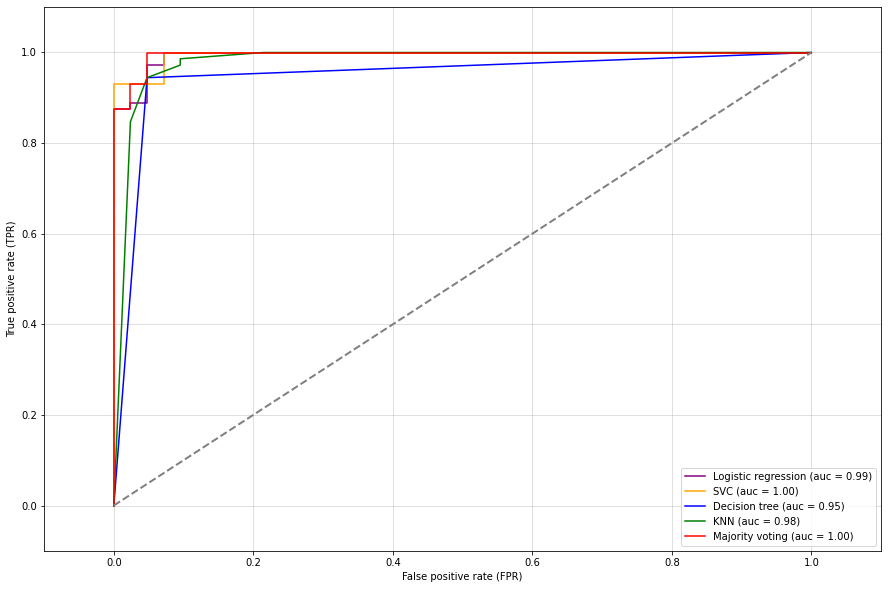

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
colors = ['purple', 'orange', 'blue', 'green', 'red']
plt.figure(figsize = (15, 10))
for clf, label, clr in zip(all_clf,
               clf_labels, colors):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.savefig('/content/drive/My Drive/Colab Notebooks/images/BC_04', dpi=300)
plt.show()

# Bảng báo cáo kết quả của mô hình Majority voting

In [27]:

print(classification_report(y_test, mv_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# Confusion matrix của mô hình Majority voting

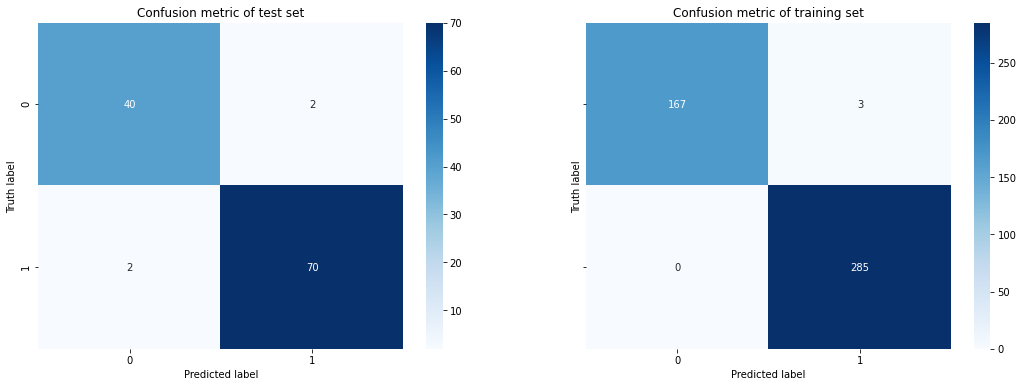

In [28]:
cm_mv_clf_train = confusion_matrix(y_train, mv_clf.predict(X_train))
cm_mv_clf_test = confusion_matrix(y_test, mv_clf.predict(X_test))
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6), sharey=True)
g1 = sns.heatmap(cm_mv_clf_test, annot = True, cmap = 'Blues', fmt = 'd', ax = ax1)
g1.set_xlabel('Predicted label')
g1.set_ylabel('Truth label')
g1.set_title('Confusion metric of test set')

g2 = sns.heatmap(cm_mv_clf_train, annot = True, cmap = 'Blues', fmt = 'd', ax = ax2)
g2.set_xlabel('Predicted label')
g2.set_ylabel('Truth label')
g2.set_title('Confusion metric of training set')
plt.savefig('/content/drive/My Drive/Colab Notebooks/images/BC_12.png', dpi=300)
plt.show()